In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('storedata.csv')
# df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
# df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df['year'] = df['date'].apply(lambda x: str(x)[:4])
df['month'] = df['date'].apply(lambda x: str(x)[:7])
df.head(1)

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,2013-01


In [100]:
sns.set()
period, cat = 'year', 'sales'
data_df = df[[period, cat]].groupby(by=[period]).sum().reset_index()
data_df[cat] = data_df[cat].apply(lambda x: format(x/1000000, '.2f'))
temp = sns.lineplot(data=data_df, x=period, y=cat)
# temp.invert_yaxis()
temp.set(xlabel=period, ylabel=f"{cat} (M)", title=f"{cat.capitalize()} Trend by {period.capitalize()} (M)")
temp.set_xticklabels(temp.get_xticklabels(), rotation=30)

C:\Users\Xinxie Wu\AppData\Local\Temp\ipykernel_16088\3309968343.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  temp.set_xticklabels(temp.get_xticklabels(), rotation=30)


[Text(0, 0, '2013'),
 Text(1, 0, '2014'),
 Text(2, 0, '2015'),
 Text(3, 0, '2016'),
 Text(4, 0, '2017')]

In [101]:
sns.lineplot(data=data_df, x=period, y=cat)

<AxesSubplot: title={'center': 'Sales Trend by Year (M)'}, xlabel='year', ylabel='sales (M)'>

In [96]:
cat, period, variable = 'growth', 'year', 'sales'
temp = df[[period, variable]].groupby(by=[period]).sum().reset_index()
temp[cat] = (temp[variable].diff()/temp[variable])
temp.dropna(inplace=True)
# temp = temp.reset_index()
temp[cat] = temp[cat].apply(lambda x: format(x, '.2%'))
# temp['sales_dif'] = temp['sales'].diff()
# temp['dif_rate'] = temp['sales'].diff() / temp['sales']
# temp.dropna(inplace=True)
# temp['dif_rate'] = temp['dif_rate'].apply(lambda x: format(x, '.2%'))
temp

,year,sales,growth
1,2014,9135482,13.07%
2,2015,9536887,4.21%
3,2016,10357160,7.92%
4,2017,10733740,3.51%


In [94]:
type(temp)

pandas.core.frame.DataFrame

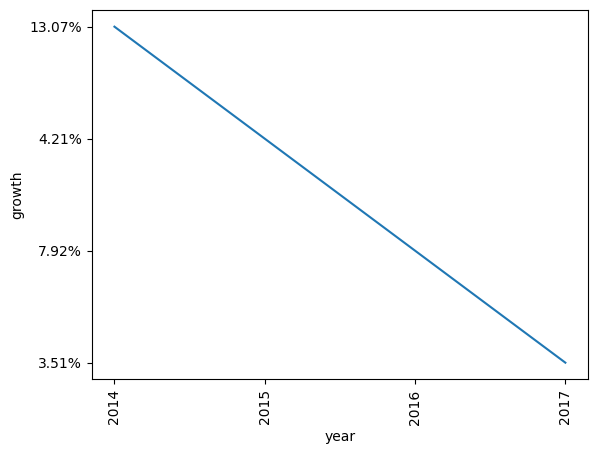

In [97]:
# plt.figure(figsize=(15,8))
sns.reset_defaults()
sns.lineplot(data=temp, x=period, y=cat)
# test.invert_yaxis()
plt.xticks(rotation=90)
plt.show()